# Black box (?)
by: Santiago Hincapie-Potes

### MNIST
a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape, 28*28)
print(y.shape)

(70000, 784) 784
(70000,)


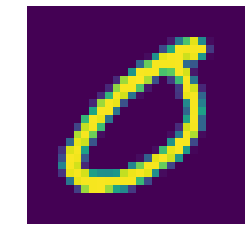

0.0


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit = X[420]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, interpolation="nearest")
plt.axis("off")

plt.show()
print(y[420])

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen.

Shuffling may be a bad idea in some context

In [10]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

In [11]:
# "0-detector"
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=100)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures
Evaluating a classifier is often significantly tricky

### K-fold Cross-validation
splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.97760112, 0.98725   , 0.9880994 ])

jmmmm $\sim98\%$ looks amazing, doesn't it?

In [27]:
from sklearn.base import BaseEstimator

class Never0Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

Can you guess this model’s accuracy?

In [28]:
bad = Never0Classifier()

cross_val_score(bad, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.8975 , 0.9022 , 0.90415])

### Confusion Matrix

### Precision/Recall

### The ROC Curve

## Multiclass Classification

### Error Analysis

# Training Models

### Linear Regression

### Polynomial Regression

## Gradient Descent